# **2. Tratamiento de datos en Colab**

La idea de esta guía es que puedas cargar datos de tus mediciones y hacer estadística sobre los mismos.

Como es usual, se importarán las bibliotecas `numpy` y `matplotlib`. Asimismo, se agregó la biblioteca `pandas` para el tratamiento de datos y `scipy.stats` para funcionalidades estadísticas.

Recordá que, para que la importación impacte en tu entorno, tenés que ejecutar el bloque de código.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import pandas as pd

from scipy.stats import norm

## 2.1. Carga manual de datos

Una manera en la que podés cargar tus datos es manualmente, es decir, transcribiendo dato por dato.

En tu caso, seguramente tengas varias mediciones (muestras) de una misma magnitud: por ejemplo, el periodo de un péndulo. Lo ideal es que puedas ordenar todos esos datos de forma tal que sean interpretables en tu código.

Una forma de ordenar tus datos es generando un `np.array` (en inglés, *array* es vector); otra, generando `lists` (listas) de datos.

En el bloque a continuación se asigna a la variable `x` un vector `np.array([...])` correspondiente a una muestra de $50$ valores de $x=\{1.94103749,...,2.02593753\}$. Probá ejecutar este bloque y luego, en el siguiente, verificar con `print(x)` que se reproducen los datos esperados.

In [2]:
x = np.array([
  1.94103749, 2.00718904, 2.20809976, 2.00650681, 1.79521143, 2.02067701,
  1.96354232, 2.08666329, 2.07032700, 2.01001679, 1.98252654, 1.88389174,
  2.12969658, 2.06554764, 2.30011605, 2.08638663, 2.01029903, 2.00930267,
  2.16685615, 1.99138998, 2.11546209, 1.96699067, 1.98705451, 1.96768280,
  2.06849758, 1.89826898, 1.92836394, 2.02448159, 1.88843933, 2.18733281,
  1.92635307, 1.92931554, 1.97016973, 2.07807494, 2.07263575, 1.85317163,
  1.98363173, 2.02454932, 2.24650423, 2.15884463, 2.11279113, 1.97011169,
  2.05139696, 2.14017246, 1.91786618, 2.02721005, 1.98865949, 2.01849060,
  2.01220534, 2.02593753
  ])

In [3]:
print(x)

[1.94103749 2.00718904 2.20809976 2.00650681 1.79521143 2.02067701
 1.96354232 2.08666329 2.070327   2.01001679 1.98252654 1.88389174
 2.12969658 2.06554764 2.30011605 2.08638663 2.01029903 2.00930267
 2.16685615 1.99138998 2.11546209 1.96699067 1.98705451 1.9676828
 2.06849758 1.89826898 1.92836394 2.02448159 1.88843933 2.18733281
 1.92635307 1.92931554 1.97016973 2.07807494 2.07263575 1.85317163
 1.98363173 2.02454932 2.24650423 2.15884463 2.11279113 1.97011169
 2.05139696 2.14017246 1.91786618 2.02721005 1.98865949 2.0184906
 2.01220534 2.02593753]


Dado que la variable `x` es un vector, un elemento $x_i$ puede obtenerse escribiendo `x[i]`, donde `i` es la posición del elemento en cuestión. En Python, los vectores empiezan siempre en `i=0` y terminan en `i=n-1`, donde `n=len(x)` es el número total de elementos. Además, podés recorrer el vector `x` desde el último hacia el primero tomando valores de `i` negativos.

Para ejemplificar esto, ejecutá el siguiente bloque de código para obtener el número total de elementos `len(x)`; así como los valores del tercer `x[2]` y anteúltimo `x[-2]` elemento.

In [4]:
print(len(x))
print(x[2])
print(x[-2])

50
2.20809976
2.01220534


## 2.2. Importando datos externos

En muchas ocasiones, en especial cuando uno sistematiza experimentos, los datos no son ingresados manualmente; en cambio, son almacenados en algún archivo externo (por ejemplo, `.csv`) y luego importados en el entorno donde se analizan los datos.

Para este ejemplo, tenés a disposición el archivo `guia_colab_02_datos_data.csv` adjunto a esta guía. Este archivo contiene los mismos datos que el inciso anterior, pero en un formato *CSV* (*comma-separated values*, o *valores separados por comas*). En analogía con una tabla de datos, cada línea representa una fila y cada `,` (coma) la separación entre columnas.

Antes de empezar, sería importante que puedas abrir el archivo provisto con un editor de texto sin formato (por ejemplo, bloc de notas). El archivo registra, por cada medición, el número de medición como `number` y, separado por coma, el correspondiente periodo medido como `period`. Intentá pensar la analogía entre el formato CSV y una tabla de datos: por ejemplo, el periodo $1.79521143\, \textrm{s}$ de la medición 5 se ubica en la fila 6 y columna 2.

Para importar tus datos primero necesitás subir el archivo `guia_colab_02_datos_data.csv` a tu entorno de trabajo. En el entorno de Colab, los archivos pueden subirse y administrarse desde la sección *Files* (usualmente, en el márgen izquierdo señalizado con el ícono de una carpeta). Luego de esto, resta *parsear* (analizar) el `.csv` para que tus datos puedan ser extraídos y registrados como vectores en una o más variables. Muchas veces esto puede ser complicado, ya que hay muchas formas de confeccionar un `.csv`, en especial si hay distintos tipos de datos.

En el siguiente bloque se lee y parsea el CSV importado con nombre de archivo `guia_colab_02_datos_data.csv`; para finalmente asignar los valores del número de medición a la variable `n` y los respectivos promedios a la variable `x`. Intentá ejecutar el código y verificá si obtenés el mismo vector del inciso anterior.

In [5]:
df = pd.read_csv('guia_colab_02_datos_data.csv', decimal='.', sep=',', skiprows=0)
df = pd.DataFrame(df).to_numpy()
n = df[:,0]
x = df[:,1]
print(x)

[1.94103749 2.00718904 2.20809976 2.00650681 1.79521143 2.02067701
 1.96354232 2.08666329 2.070327   2.01001679 1.98252654 1.88389174
 2.12969658 2.06554764 2.30011605 2.08638663 2.01029903 2.00930267
 2.16685615 1.99138998 2.11546209 1.96699067 1.98705451 1.9676828
 2.06849758 1.89826898 1.92836394 2.02448159 1.88843933 2.18733281
 1.92635307 1.92931554 1.97016973 2.07807494 2.07263575 1.85317163
 1.98363173 2.02454932 2.24650423 2.15884463 2.11279113 1.97011169
 2.05139696 2.14017246 1.91786618 2.02721005 1.98865949 2.0184906
 2.01220534 2.02593753]


Un detalle muy importante respecto a los CSV es que, en muchas ocasiones, se encuentran en un formato no estándar. Por ejemplo, un editor de hojas de cálculo configurado para Argentina utilizará `;` (punto y coma) o `\t` (tabulación) como separador de columnas y `,` (coma) como separador decimal. Por este motivo, es crucial que verifiques previamente con un editor de texto plano el formato de tu archivo CSV. Si el archivo CSV difiere del estándar discutido, es necesario que edites el CSV manualmente o bien, alternativamente, en `pd.read_csv` podés configurar diferentes valores `decimal` (separador decimal), `decimal` (separador de columnas) y `skiprows` (número de filas a omitirse sin contar cabecera).

## 2.3. Estadísticos

Suponé que los datos almacenados en la variable `x` son tus mediciones experimentales. A priori, como mucho, podés inferir de qué distribución de probabilidad provienen dichas mediciones. La idea es que ahora puedas aplicar herramientas estadísticas para obtener estimaciones sobre tus mediciones.

Una forma sencilla de hacer un análisis estadístico es calculando la media $(\bar{x})$, desviación estándar $(\sigma_x)$, varianza $(\sigma^2_x)$. En el siguiente bloque se ejemplifica este cálculo para la variable `x` de los incisos anteriores.

In [6]:
avg = np.mean(x)
std = np.std(x)
var = np.var(x)

print('Media:', avg)
print('Desviación Estándar:', std)
print('Varianza:', var)

Media: 2.025519005
Desviación Estándar: 0.09908039333644302
Varianza: 0.009816924343704262


Una forma usual de reportar el valor medio con su incerteza es $\bar{x}\pm\sigma_{\bar{x}}$, donde $\sigma_{\bar{x}}=\sigma_x/\sqrt{N}$ es el *error estándar* de la media (en inglés, *SEM* o *Standard Error of the Mean*) del conjunto de $N$ mediciones. En el siguiente bloque se ejemplifica el cálculo de $\sigma_{\bar{x}}$.

In [7]:
N = len(x)
sem = np.std(x, ddof=1)/np.sqrt(N)
print('Número de mediciones:', N)
print('Error estándar de la media:', sem)

Número de mediciones: 50
Error estándar de la media: 0.014154341905206144


Finalmente, para este ejemplo, suponiendo que $x$ es una magnitud temporal (medida en segundos) y que sus únicas incertezas son estadísticas, puede reportarse $(2.026\pm0.014) \,\text{s}$.

## 2.4. Histograma

Una forma posible y útil de representar tus datos es construyendo histogramas. La construcción del histograma se puede hacer fácilmente con `plt.hist()`. Ejecutá el siguiente bloque para construir el histograma. Luego, intentá reconstruirlo modificando el número total de `bins` hasta hallar un histograma que resulte representativo.

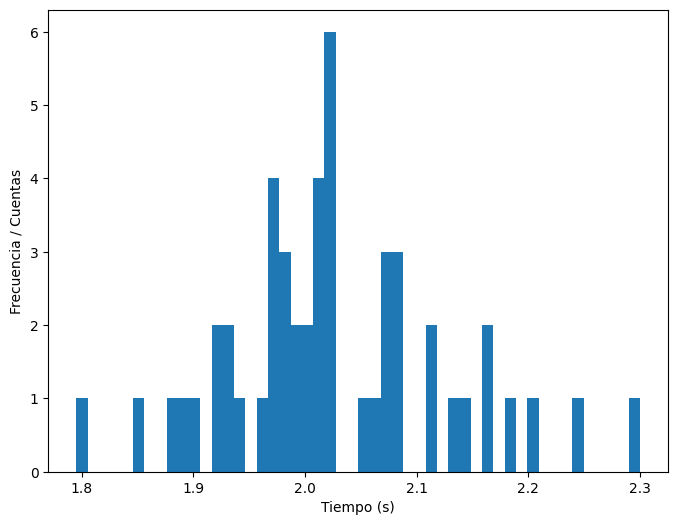

In [8]:
plt.figure(figsize=(8,6),dpi=100)
plt.hist(x, bins = 50);
plt.xlabel('Tiempo (s)');
plt.ylabel('Frecuencia / Cuentas');

## 2.5. Ajuste gaussiano

Otra forma de analizar los datos es haciendo un *fitting* (ajuste) de la distribución de probabilidad esperada con tus datos. En este caso, la muestra se supone proveniente de una *Distribución de Probabilidad Normal (o Gaussiana)* definida como $N(\mu,\sigma^2)$ de media $\mu$ y desviación estándar  $\sigma$.

Intentá ejecutar los siguientes bloques para efectuar un ajuste gaussiano y, luego, graficar dicho ajuste sobre el histograma normalizado.

In [9]:
(mu, sigma) = norm.fit(x)

print('Media:', mu)
print('Desviación estándar:', sigma)

Media: 2.025519005
Desviación estándar: 0.09908039333644302


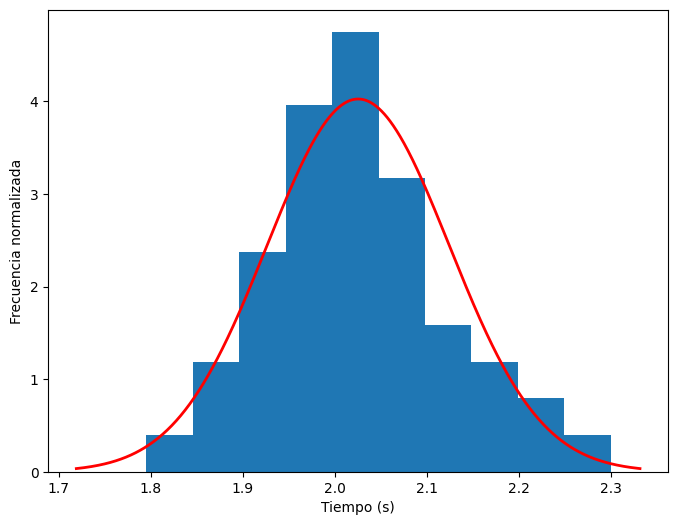

In [10]:
plt.figure(figsize=(8,6),dpi=100)

plt.hist(x, bins=10, density=True);

axis = np.linspace(norm.ppf(0.001,mu,sigma), norm.ppf(0.999,mu,sigma), 1000)
x_pdf = norm.pdf(axis,mu,sigma)

plt.plot(axis, x_pdf, 'r-', linewidth=2);
plt.xlabel('Tiempo (s)');
plt.ylabel('Frecuencia normalizada');

## 2.6. Generando datos simulados (opcional)

Como nota de color, los datos proporcionados para esta guía (almacenados en `x`) no fueron mediciones experimentales. En cambio, la muestra provino de realizar una simulación en la que se obtuvieran datos provenientes de una distribución $N(\mu=2.0,\sigma=0.1)$; es decir, con media $\mu=2.0$ y desviación estándar $\sigma=0.1$.

A modo de ejemplificar, el bloque de código a continuación te permitirá generar $50$ muestras aleatorias provenientes de la distribución y parámetros mencionados.

In [11]:
mu = 2.0
sigma = 0.1
samples = 50

xs = np.random.normal(mu, sigma, size = samples)

print(xs)

[2.09057151 2.0597087  1.83702667 1.95519642 2.11695831 1.96886266
 2.02301526 2.0621079  2.16665723 2.16430938 1.98327189 2.09847943
 2.04934004 1.78156105 1.88446685 1.96285304 2.048871   2.10306831
 2.09252945 2.04742034 2.05213474 2.00550606 2.050727   1.98466775
 1.95257667 1.81280391 2.04535598 2.10763349 2.01724204 2.15784398
 2.04877273 2.03728897 2.13778969 2.218486   1.94312302 2.07163016
 1.97508688 1.97594325 1.96820569 1.95601139 1.95651904 2.09092464
 2.00511468 1.97148304 1.96059983 1.93036572 2.04058964 1.97314844
 1.94426703 2.05405718]


Más allá de lo ilustrativo del caso, muchas veces es muy útil generar *sets* de datos o *sampleos* para contrastarlos con mediciones experimentales. En particular, esto permite verificar mediantes *tests* si las mediciones experimentales provienen de la distribución esperada; o, de igual forma, verificar con cierto grado de certeza si existen datos adulterados.

## 2.7. Comentarios sobre la guía

Esta breve guía tuvo como objetivo introducirte en algunas formas posibles de analizar tus resultados. La sugerencia más importante es que intentes reproducir estas herramientas con tus propias mediciones y que efectúes, de a poco, cambios con tus propios códigos. Asimismo, intentá investigar cómo mejorar la representación de tus gráficos con leyendas, ejes y demás: es importante que los resultados (finales) que presentes estén bien confeccionados.

> *Documento elaborado por Adán Garros (adan@garros.net) bajo licencia [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es). Se agradece especialmente a Verónica Pérez Schuster por la revisión del contenido. Resultan bienvenidos comentarios y sugerencias. Última actualización: 2022-10-03.*